# Regression with California Housing

In [8]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pydot

In [24]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.utils import *
from tensorflow.keras.callbacks import *

In [6]:
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

# Dataset Characteristics
- Records: 20640
- Attributes
  - MedInc        median income in block
  - HouseAge      median house age in block
  - AveRooms      average number of rooms
  - AveBedrms     average number of bedrooms
  - Population    block population
  - AveOccup      average house occupancy
  - Latitude      house block latitude
  - Longitude     house block longitude

In [ ]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state = 42)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [ ]:
X_train.shape

(11610, 8)

In [ ]:
model = Sequential([
    Dense(30, activation="relu", input_shape = X_train.shape[1:]),
    Dense(30, activation="relu"),
    Dense(1)
])

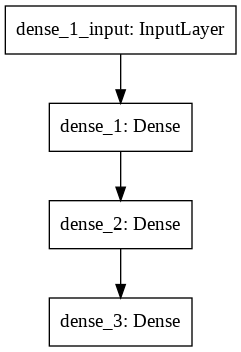

In [ ]:
plot_model(model)

In [ ]:
from tensorflow.keras.optimizers import SGD

model.compile(loss = "mean_squared_error",
              optimizer = SGD(learning_rate = 1e-3),
              metrics = ["mae"])

In [ ]:
model_history = model.fit(X_train, y_train,
                          epochs = 20,
                          validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
model_history.history

{'loss': [1.8866394758224487,
  0.6577127575874329,
  0.5934185981750488,
  0.5557191371917725,
  0.5271905064582825,
  0.5032976269721985,
  0.48535558581352234,
  0.47091808915138245,
  0.45779934525489807,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.4260515868663788,
  0.42017653584480286,
  0.41549986600875854,
  0.4111650586128235,
  0.4077068567276001,
  0.40395283699035645,
  0.4004494547843933,
  0.3979603350162506],
 'mae': [0.9900256991386414,
  0.6041510701179504,
  0.5618005990982056,
  0.5398454070091248,
  0.5237294435501099,
  0.5112562775611877,
  0.5010153651237488,
  0.492448091506958,
  0.4857262372970581,
  0.4797375202178955,
  0.4744163453578949,
  0.4703480303287506,
  0.46740880608558655,
  0.46360209584236145,
  0.4612663984298706,
  0.4591343402862549,
  0.4568699896335602,
  0.45453643798828125,
  0.4521065056324005,
  0.45083147287368774],
 'val_loss': [0.7126055359840393,
  0.6880088448524475,
  0.5803287029266357,
  0.51660853624

In [ ]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3942 - mae: 0.4502


In [7]:
def plot_history(model_history):
    pd.DataFrame(model_history.history).plot(figsize = (8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)

    plt.show()

In [9]:
# Functional API
input = Input(shape = X_train.shape[1:])
hidden_1 = Dense(30, activation = "relu")(input)
hidden_2 = Dense(30, activation = "relu")(hidden_1)
concat = concatenate([input, hidden_2])
output = Dense(1)(concat)

model = Model(inputs = [input], outputs = [output])

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

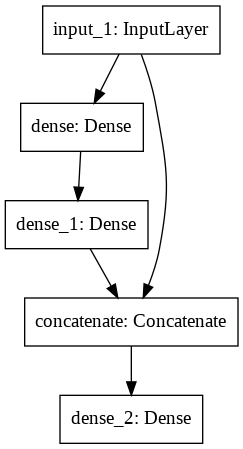

In [13]:
plot_model(model)

In [15]:
model.compile(loss = "mean_squared_error",
              optimizer = SGD(learning_rate = 1e-3),
              metrics = ["mae"])

In [16]:
model_history = model.fit(X_train, y_train,
                          epochs = 40,
                          validation_data = (X_valid, y_valid))

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 1.2611 - mae: 0.7852 - val_loss: 3.3940 - val_mae: 0.6266
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.6580 - mae: 0.5812 - val_loss: 0.9360 - val_mae: 0.5652
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5878 - mae: 0.5550 - val_loss: 0.5649 - val_mae: 0.5328
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5582 - mae: 0.5405 - val_loss: 0.5712 - val_mae: 0.5239
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5347 - mae: 0.5274 - val_loss: 0.5045 - val_mae: 0.5068
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5158 - mae: 0.5182 - val_loss: 0.4831 - val_mae: 0.4966
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5002 - mae: 0.5097 - val_loss: 0.4639 - val_mae: 0.4890
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 0.

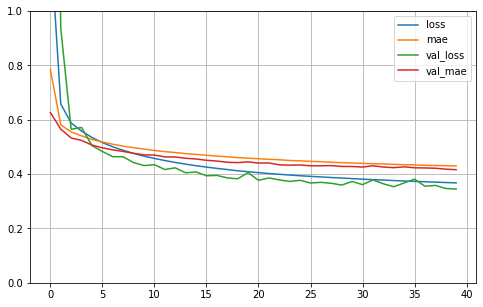

In [17]:
plot_history(model_history)

In [18]:
model.save("regression_shortcircuit.h5")

In [19]:
%pwd

'/content'

In [20]:
del model

In [21]:
model = load_model("regression_shortcircuit.h5")

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

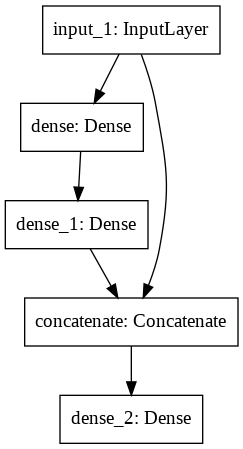

In [23]:
plot_model(model)

# Using Callbacks during Training

In [25]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [26]:
model = Sequential([
    Dense(30, activation="relu", input_shape = X_train.shape[1:]),
    Dense(30, activation="relu"),
    Dense(1)
])

In [27]:
model.compile(loss = "mse",
              optimizer = SGD(learning_rate = 1e-3))

In [31]:
model_history = model.fit(X_train, y_train,
                          epochs = 10,
                          validation_data = (X_valid, y_valid),
                          callbacks = [
                              ModelCheckpoint("Model-{epoch:02d}.h5", save_best_only = True),
                              EarlyStopping(patience = 10, restore_best_weights = True)
                          ])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4258 - val_loss: 0.3983
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4201 - val_loss: 0.4037
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4157 - val_loss: 0.3891
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4112 - val_loss: 0.3855
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4074 - val_loss: 0.3812
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4038 - val_loss: 0.3784
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4006 - val_loss: 0.3781
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3978 - val_loss: 0.3731
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3950 - val_loss: 0.3693
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3922 - val_loss: 0.3667